In [9]:
import time

from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By

In [10]:
driver = Chrome()
driver.get("https://books.toscrape.com/")

In [11]:
last_height = driver.execute_script("return document.body.scrollHeight;")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    time.sleep(3)

    new_height = driver.execute_script("return document.body.scrollHeight;")

    if new_height == last_height:
        break
    last_height = new_height

In [12]:
categoryLinksUl = driver.find_element(By.CLASS_NAME, "nav-list" )
categoryListItems = categoryLinksUl.find_elements(By.TAG_NAME, "li")
categoryLinks = [ listItem.find_element(By.TAG_NAME, "a") for listItem in categoryListItems ]
categoryLinksUrl = [ categoryLink.get_property("href") for categoryLink in categoryLinks ]
categoryNames = [ categoryLink.text for categoryLink in categoryLinks ]

In [13]:
books_by_category = {}

for i in range(len(categoryNames)):
    if i == 5: #prvite 5 kategorii
        break

    category_url = categoryLinksUrl[i+1]
    driver.get(category_url)
    books = []

    booksDivs = driver.find_elements(By.CLASS_NAME, "product_pod")[:4] # 4 knigi
    booksH3 = [bookDiv.find_element(By.TAG_NAME, "h3") for bookDiv in booksDivs]
    books += [bookH3.find_element(By.TAG_NAME, "a").text for bookH3 in booksH3]

    books_by_category[categoryNames[i+1]] = books

driver.quit()
print(books_by_category)

{'Travel': ["It's Only the Himalayas", 'Full Moon over Noah’s ...', 'See America: A Celebration ...', 'Vagabonding: An Uncommon Guide ...'], 'Mystery': ['Sharp Objects', 'In a Dark, Dark ...', 'The Past Never Ends', 'A Murder in Time'], 'Historical Fiction': ['Tipping the Velvet', 'Forever and Forever: The ...', 'A Flight of Arrows ...', 'The House by the ...'], 'Sequential Art': ["Scott Pilgrim's Precious Little ...", 'Tsubasa: WoRLD CHRoNiCLE 2 ...', 'This One Summer', 'The Nameless City (The ...'], 'Classics': ['The Secret Garden', 'The Metamorphosis', "The Pilgrim's Progress", 'The Hound of the ...']}


In [14]:
import pandas as pd

data = []
for category, books in books_by_category.items():
    for book in books:
        data.append({"Category": category, "Book Title": book})

df = pd.DataFrame(data)

print(df)

              Category                           Book Title
0               Travel              It's Only the Himalayas
1               Travel            Full Moon over Noah’s ...
2               Travel       See America: A Celebration ...
3               Travel   Vagabonding: An Uncommon Guide ...
4              Mystery                        Sharp Objects
5              Mystery                  In a Dark, Dark ...
6              Mystery                  The Past Never Ends
7              Mystery                     A Murder in Time
8   Historical Fiction                   Tipping the Velvet
9   Historical Fiction         Forever and Forever: The ...
10  Historical Fiction               A Flight of Arrows ...
11  Historical Fiction                 The House by the ...
12      Sequential Art  Scott Pilgrim's Precious Little ...
13      Sequential Art       Tsubasa: WoRLD CHRoNiCLE 2 ...
14      Sequential Art                      This One Summer
15      Sequential Art           The Nam

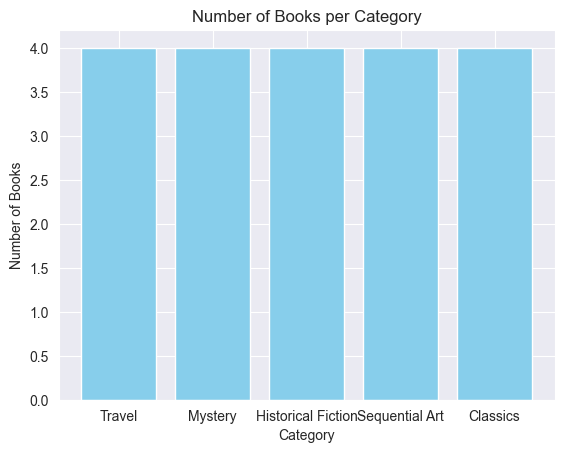

In [15]:
import matplotlib.pyplot as plt

category_counts = df['Category'].value_counts()

plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.title('Number of Books per Category')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.show()